# Shortest Path in Graph

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

C:\Users\Sachin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


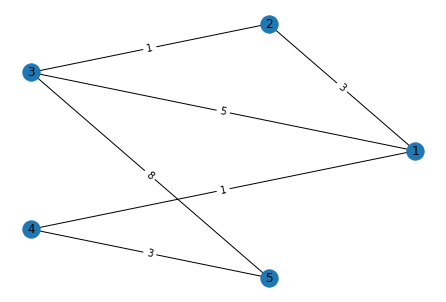

In [2]:
G=nx.Graph()
G.add_edge(1,2,weight=2)
G.add_edge(2,1,weight=3)
G.add_edge(2,3,weight=4)
G.add_edge(3,2,weight=1)
G.add_edge(1,3,weight=2)
G.add_edge(3,1,weight=5)
G.add_edge(1,4,weight=3)
G.add_edge(4,1,weight=1)
G.add_edge(3,5,weight=6)
G.add_edge(5,3,weight=8)
G.add_edge(4,5,weight=1)
G.add_edge(5,4,weight=3)
weight=nx.get_edge_attributes(G,'weight')
pos=nx.circular_layout(G) 
nx.draw(G,pos,with_labels=True) 
nx.draw_networkx_edge_labels(G,pos,edge_labels=weight)
plt.show()

In [3]:
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 3}), (1, 3, {'weight': 5}), (1, 4, {'weight': 1}), (2, 3, {'weight': 1}), (3, 5, {'weight': 8}), (4, 5, {'weight': 3})])

In [4]:
def shortest_path_betweeness(G,s,d):
    bc = nx.betweenness_centrality(G,weight = 'weight') 
    shortest_path=[]
    n = len(G.nodes())
    r=0
    for path in nx.all_simple_paths(G, source=s, target=d):
        c=0
        if(len(path)==2):
            shortest_path=path
            break
        else:
            for j in range(1,len(path)-1):
                c=c+bc[path[j]]
            c=c/(len(path)-2)
            if c>=r:
                r=c
                shortest_path=path
    return shortest_path

In [5]:
s = int(input("Enter source node number:"))
d = int(input("Enter destination node number:"))
print("Shortest path using betweeness centrality:",shortest_path_betweeness(G,s,d))
print("Shortest path using Dijkstra's algorithm:",nx.dijkstra_path(G,s,d,weight='weight'))

Enter source node number:2
Enter destination node number:5
Shortest path using betweeness centrality: [2, 1, 4, 5]
Shortest path using Dijkstra's algorithm: [2, 1, 4, 5]


In [6]:
print("Shortest path using betweeness centrality:\n")
print("Source\tDestination\t\tPath")
for i in range(1,6):
    for j in range(1,6):
        if i != j:
            print(i,"\t",j,"\t\t",shortest_path_betweeness(G,i,j))

Shortest path using betweeness centrality:

Source	Destination		Path
1 	 2 		 [1, 2]
1 	 3 		 [1, 3]
1 	 4 		 [1, 4]
1 	 5 		 [1, 4, 5]
2 	 1 		 [2, 1]
2 	 3 		 [2, 3]
2 	 4 		 [2, 1, 4]
2 	 5 		 [2, 1, 4, 5]
3 	 1 		 [3, 1]
3 	 2 		 [3, 2]
3 	 4 		 [3, 1, 4]
3 	 5 		 [3, 5]
4 	 1 		 [4, 1]
4 	 2 		 [4, 1, 2]
4 	 3 		 [4, 1, 3]
4 	 5 		 [4, 5]
5 	 1 		 [5, 4, 1]
5 	 2 		 [5, 4, 1, 2]
5 	 3 		 [5, 3]
5 	 4 		 [5, 4]


In [7]:
print("Shortest path using Dijkstra's algorithm:\n")
print("Source\tDestination\t\tPath")
for i in range(1,6):
    for j in range(1,6):
        if i != j:
            print(i,"\t",j,"\t\t",nx.dijkstra_path(G,i,j))

Shortest path using Dijkstra's algorithm:

Source	Destination		Path
1 	 2 		 [1, 2]
1 	 3 		 [1, 2, 3]
1 	 4 		 [1, 4]
1 	 5 		 [1, 4, 5]
2 	 1 		 [2, 1]
2 	 3 		 [2, 3]
2 	 4 		 [2, 1, 4]
2 	 5 		 [2, 1, 4, 5]
3 	 1 		 [3, 2, 1]
3 	 2 		 [3, 2]
3 	 4 		 [3, 2, 1, 4]
3 	 5 		 [3, 5]
4 	 1 		 [4, 1]
4 	 2 		 [4, 1, 2]
4 	 3 		 [4, 1, 2, 3]
4 	 5 		 [4, 5]
5 	 1 		 [5, 4, 1]
5 	 2 		 [5, 4, 1, 2]
5 	 3 		 [5, 3]
5 	 4 		 [5, 4]
